<a href="https://colab.research.google.com/github/stswee/ECE219/blob/main/ECE219_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminaries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
import os

# Set random seeds
np.random.seed(42)
random.seed(42)

base_path = os.getcwd()
print(f"Base Path: {base_path}")

Base Path: /Users/richardlee/Desktop/UCLA/Classes/2025_Winter/ECE219/ECE219


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/richardlee/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/richardlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/richardlee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/richardlee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/richardlee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [2]:
data_path = os.path.join(base_path, "Project 1/Data/Project1-ClassificationDataset.csv")
df = pd.read_csv(data_path)
display(df)

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports
...,...,...,...,...,...,...,...,...
3471,'The Virginia Department of Forestry continues...,'The Virginia Department of Forestry continues...,"['forest', 'emergency', 'fueling', 'delayed', ...",2023-11-09 20:43:12+00:00,"['Crystal Graham', 'View All Posts Crystal Gra...",https://augustafreepress.com/news/lack-of-rain...,heatwave,climate
3472,'State Alabama Alaska Arizona Arkansas Califor...,'State Alabama Alaska Arizona Arkansas Califor...,"['south', 'forces', 'west', 'washington', 'isl...",NaN,['Rick Steelhammer Rsteelhammer Hdmediallc.Com...,https://www.wvgazettemail.com/news/forest-fire...,heatwave,climate
3473,'Chengdu showcases technological strength at h...,'Chengdu showcases technological strength at h...,"['strength', 'sichuan', 'institute', 'transfor...",NaN,[],http://www.itnewsonline.com/PRNewswire/Chengdu...,heatwave,climate
3474,"'Bluefield, WV (24701)\n\nToday\n\nPartly clou...","'Bluefield, WV (24701)TodayPartly cloudy skies...","['valley', 'evening', '26f', 'steep', 'skies',...",NaN,"['Steve Keenan', 'Skeenan Register-Herald.Com'...",https://www.bdtonline.com/news/steep-valley-fi...,heatwave,climate


## Geting familiar with the dataset

### Question 1

In [3]:
# Overview
numrows = df.shape[0]
numcols = df.shape[1]

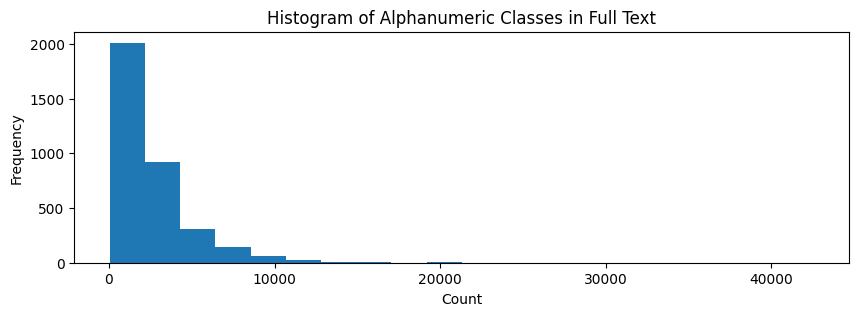

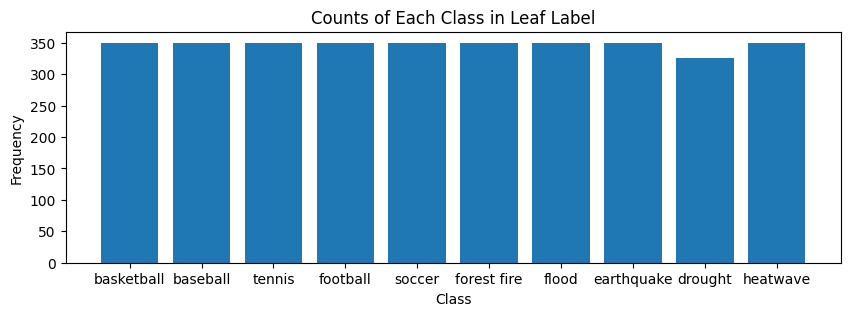

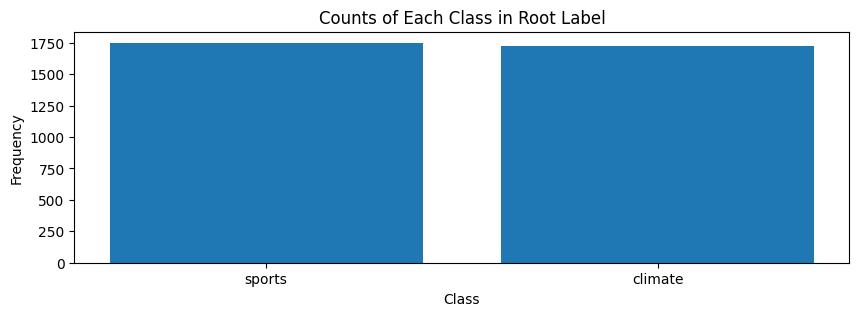

In [4]:
# Histograms
def count_alphanumeric(text = str) -> int:
  """
  Counts the number of alphanumeric characters in a string.

  Parameters
  ----------
  text : str
    The string to count the alphanumeric characters in.

  Returns
  -------
  int
    The number of alphanumeric characters in the string.
  """
  count = 0
  for char in text:
    if char.isalnum():
      count += 1
  return count

def count_classes(df = pd.DataFrame, col = str) -> list:
  """
  Counts the number of classes in a column of a dataframe.

  Parameters
  ----------
  df : pd.DataFrame
    The dataframe to count the classes in.
  col : str
    The column to count the classes in.

  Returns
  -------
  2 lists
    A list of classes and a list of the counts of classes in the column.
  """
  classes = df[col].unique()
  counts = []
  for unique_class in classes:
    counts.append(df[col].str.contains(unique_class).sum())
  return classes, counts

# Keep track of counts of alphanumeric characters
count_alphanumeric_full_text = []
for text in df['full_text']:
  count_alphanumeric_full_text.append(count_alphanumeric(text))

# Keep track of counts of each class
classes_leaf_label, count_classes_leaf_label = count_classes(df, 'leaf_label')
classes_root_label, count_classes_root_label = count_classes(df, 'root_label')

# Histogram of alphanumeric characters
plt.figure(figsize=(10, 3))
plt.hist(count_alphanumeric_full_text, bins = 20)
plt.title('Histogram of Alphanumeric Classes in Full Text')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of counts of each class in leaf_label
plt.figure(figsize=(10, 3))
plt.bar(classes_leaf_label, count_classes_leaf_label)
plt.title('Counts of Each Class in Leaf Label')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Histogram of counts of each class in root_label
plt.figure(figsize=(10, 3))
plt.bar(classes_root_label, count_classes_root_label)
plt.title('Counts of Each Class in Root Label')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

TODO:
Some qualitative interpretation...

## Binary Classification

### 1. Splitting the entire dataset into training and testing data

In [5]:
# Set seeds
np.random.seed(42)
random.seed(42)

# Split dataset
train, test = train_test_split(df[["full_text", "root_label"]], test_size = 0.2)

### Question 2

In [6]:
# Count number of rows in train and test
num_train = train.shape[0]
num_test = test.shape[0]

# Display results
print("Number of rows in train:", num_train)
print("Number of rows in test:", num_test)


Number of rows in train: 2780
Number of rows in test: 696


### 2. Feature Extraction

### Question 3

In [ ]:
def clean(text):
    """Clean raw text by removing URLs, HTML tags, special chars, repeated spaces, etc."""
    # Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"", texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u ', " you ", texter)
    texter = re.sub('`', "", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ', texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)

    # Edge case: if nothing remains
    if texter == "":
        texter = ""
        
    return texter

In [ ]:
def custom_tokenize_and_lemmatize(text, max_punct_count=0, common_words_dict=None):
    """
    Custom tokenizer that cleans, tokenizes, filters, and lemmatizes text.
    """
    common_words_dict = common_words_dict or {}

    def get_pos_wordnet(treebank_tag):
        """
        Convert a Penn Treebank tag to a WordNet POS tag for better lemmatization.
        """

        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    def filter_word(word):
        """
        Filter out the word based on given criteria.

        Returns
        False: if the word meets the given criteria
        True: if the word is filtered out
        """
        # remove word in common_words_dict
        if word in common_words_dict:
            return True
        
        # remove number-only word
        if re.match(r'^\d+(?:\.\d+)?$', word):
            #print(f"Filtered numeric token: {word}")
            return True
        
        # remove words ending with 's' if preceded by a digit -> exception handling to remove all number-only word in the final stage
        if re.match(r'\d+s$', word): 
            return True  # Do not filter out

        punctuation_set = set(string.punctuation)
        # remove word more than max_punct_count
        if sum(1 for char in word if char in punctuation_set) > max_punct_count:
            return True

    text = clean(text).lower()
    tagged_tokens = pos_tag(word_tokenize(text))

    lemmatizer = WordNetLemmatizer()

    final_tokens = []
    for word, tag in tagged_tokens:
        # skip adding the word to list if the word does not meet a given critera
        if filter_word(word):
            continue
        
        # convert penn treebank tags to WordNet tags
        wn_pos = get_pos_wordnet(tag)

        # lemmatize the word
        lemma = lemmatizer.lemmatize(word,wn_pos)
        final_tokens.append(lemma)

    return final_tokens

# Function to create custom tokenizer with custom initial variables
def create_custom_tokenizer(max_punct_count=0, common_words_dict=None):
    def custom_tokenizer(text):
        return custom_tokenize_and_lemmatize(
            text, max_punct_count=max_punct_count, common_words_dict=common_words_dict
        )
    return custom_tokenizer

In [8]:
X_train = train['full_text']
X_test = test['full_text']
y_train = train['root_label']
y_test = test['root_label']

# TF-IDF with the Same Requirements

bow_vectorizer = CountVectorizer(
    tokenizer=custom_tokenize_and_lemmatize,
    stop_words='english',
    token_pattern=None,
    min_df=3               # Words must appear in at least 3 docs to be included
)

# Fit on training data (learn vocab) and transform
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform the test data (without updating vocab)
X_test_bow = bow_vectorizer.transform(X_test)

print("=== Bag-of-Words Vocabulary ===")
print(bow_vectorizer.vocabulary_)
print()
print("=== Training Data BOW (shape) ===", X_train_bow.shape)
print("=== Testing Data BOW (shape) ===", X_test_bow.shape)

# TF-IDF with the Same Requirements

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=custom_tokenize_and_lemmatize,
    stop_words='english',
    token_pattern=None,
    min_df=3
)

# Fit on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("=== TF-IDF Vocabulary ===")
print(tfidf_vectorizer.vocabulary_)
print()
print("=== Training Data TF-IDF (shape) ===", X_train_tfidf.shape)
print("=== Testing Data TF-IDF (shape) ===", X_test_tfidf.shape)

/Users/richardlee/anaconda3/envs/ece219_env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


=== Bag-of-Words Vocabulary ===
{'aftershock': 318, 'economic': 3611, 'impact': 5641, 'million': 7360, 'goldensky': 4888, 'festival': 4289, 'set': 10294, 'estimated': 3938, 'example': 4005, 'video': 12343, 'title': 11646, 'sacramento': 9974, 'second': 10198, 'year': 12833, 'country': 2640, 'music': 7615, 'book': 1332, 'thousand': 11573, 'fan': 4176, 'discovery': 3279, 'park': 8346, 'organizer': 8134, 'look': 6804, 'expand': 4050, 'event': 3979, 'far': 4185, 'come': 2268, 'party': 8373, 'weekend': 12563, 'u': 11932, 'magical': 6927, 'say': 10084, 'chief': 2009, 'market': 7060, 'officer': 8021, 'danny': 2866, 'wimmer': 12666, 'present': 8905, 'growth': 5025, 'really': 9336, 'remarkable': 9550, 'heel': 5280, 'bring': 1471, 'region': 9473, 'wonderful': 12723, 'phenomenal': 8562, 'mike': 7343, 'ceo': 1890, 'visit': 12391, 'plan': 8659, 'underway': 12027, 'day': 2901, 'lot': 6826, 'folk': 4464, 'visitor': 12392, 'certainly': 1896, 'local': 6762, 'enjoy': 3814, 'people': 8483, 'outside': 8196

### Effect of varing min_df on the TF-IDF vocab sizes

In [10]:
for i in range(5):
    tfidf_vectorizer = TfidfVectorizer(
        tokenizer=custom_tokenize_and_lemmatize,
        stop_words='english',
        token_pattern=None,
        min_df=i+1
    )

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    print(f"Min_df: {i+1} - Vocab Size: {X_train_tfidf.shape[1]}")


/Users/richardlee/anaconda3/envs/ece219_env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


Min_df: 1 - Vocab Size: 31832
Min_df: 2 - Vocab Size: 18589
Min_df: 3 - Vocab Size: 12899
Min_df: 4 - Vocab Size: 10630
Min_df: 5 - Vocab Size: 9159


### 1) Pros and Cons of lemmatization vs stemming

lemmatization: map the words with similar meanings (e.g. "better" -> "good")
stemming: removes prefixs and suffixes to create stem of a word

**Lemmatization**
- Pros: creates miore lunguistically correct words than stemming, reduces ambiguity
- cons: computationally more expensive and slower than stemming

**stemming**
- Pros: simpler and faster, good for accuracy is less critical
- Cons: less accurate than lemmatization, less context-aware


### 2) Effect of varing min_df on the TF-IDF vocab sizes
**As you increase min_df, the model starts to excludes more rare terms and reduces the size of the matrix.**